In [15]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans

# Đọc tập dữ liệu
data = pd.read_csv('Dry_Bean_Dataset.csv')
print (data)
x = data.drop(columns=['Class'])
#print (x)
y = data.Class
#print (y)

        Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4     Class
0      28395    610.291       208.178117  ...      0.834222      0.998724     SEKER
1      28734    638.018       200.524796  ...      0.909851      0.998430     SEKER
2      29380    624.110       212.826130  ...      0.825871      0.999066     SEKER
3      30008    645.884       210.557999  ...      0.861794      0.994199     SEKER
4      30140    620.134       201.847882  ...      0.941900      0.999166     SEKER
...      ...        ...              ...  ...           ...           ...       ...
13606  42097    759.696       288.721612  ...      0.642988      0.998385  DERMASON
13607  42101    757.499       281.576392  ...      0.676099      0.998219  DERMASON
13608  42139    759.321       281.539928  ...      0.676884      0.996767  DERMASON
13609  42147    763.779       283.382636  ...      0.668237      0.995222  DERMASON
13610  42159    772.237       295.142741  ...      0.616221      0.998180  D

In [16]:
#Kiểm tra dữ liệu bị thiếu
print(data.isnull().sum())
print("Tổng các giá trị bị thiếu: ", data.isnull().sum().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Tổng các giá trị bị thiếu:  0


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


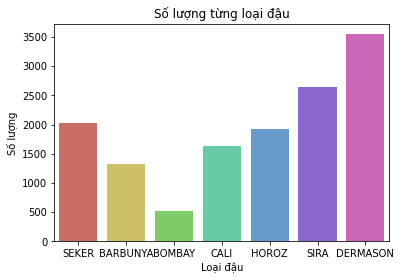

In [17]:
# Liệt kê số lượng phần tử của Class
print(data['Class'].value_counts())
sns.countplot(x='Class',data=data,palette='hls')
plt.title('Số lượng từng loại đậu')
plt.xlabel('Loại đậu')
plt.ylabel('Số lượng')
plt.show()

SVM:
Do chinh xac cua lan thu  1 là:  0.6324681684622919
Do chinh xac cua lan thu  2 là:  0.6307541625857003
Do chinh xac cua lan thu  3 là:  0.631488736532811
Do chinh xac cua lan thu  4 là:  0.6341821743388835
Do chinh xac cua lan thu  5 là:  0.6452007835455436
Do chinh xac cua lan thu  6 là:  0.6437316356513222
Do chinh xac cua lan thu  7 là:  0.6400587659157688
Do chinh xac cua lan thu  8 là:  0.6295298726738492
Do chinh xac cua lan thu  9 là:  0.6258570029382958
Do chinh xac cua lan thu  10 là:  0.6243878550440745
Do chinh xac cua lan thu  11 là:  0.6444662095984329
Do chinh xac cua lan thu  12 là:  0.631488736532811
Do chinh xac cua lan thu  13 là:  0.6300195886385896
Do chinh xac cua lan thu  14 là:  0.6256121449559255
Do chinh xac cua lan thu  15 là:  0.6322233104799216
Do chinh xac cua lan thu  16 là:  0.633692458374143
Do chinh xac cua lan thu  17 là:  0.6371204701273262
Do chinh xac cua lan thu  18 là:  0.6366307541625857
Do chinh xac cua lan thu  19 là:  0.631488736532811
D

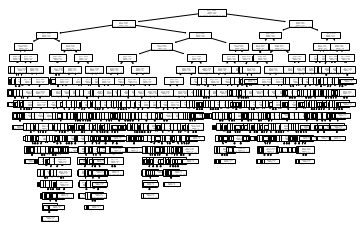

In [ ]:
#Su dụng SVM de phan loai

# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
print ("SVM:")
tb=0
n=20
for i in range(n):
	X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
	model = svm.SVC(kernel='rbf')
	model.fit(X_train,y_train)
	#Du doan nhan tap kiem tra

	y_pred=model.predict(X_test)
	#print (y_pred)

	ac=model.score(X_test,y_test)
	print ("Do chinh xac cua lan thu ", i+1 ,"là: ",ac)	
	tb+=ac
print ("Do chinh xac Trung binh: ",tb/n)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#model = svm.SVC(kernel='linear', C=100)
#DCX=0.93
# Xây dựng mô hình svm sử dụng hàm nhân (kernel) là RBF
# SVC là viết tắt của từ Support Vector Classification
model = svm.SVC(kernel='rbf')
scores = cross_val_score(model, x, y, cv=5)
predicted = cross_val_predict(model, x, y, cv=5) 
#model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
#prediction = model.predict(X_test)
print ("SVM phan loai:")
ac_score = metrics.accuracy_score(y, predicted)
print (ac_score)

cl_report = metrics.classification_report(y, predicted)
print (cl_report)
print("Do chinh xac cua mo hinh " , np.mean(scores))



print ("======================\n\n\n===================")

#Giai thuat Knn
#su dung nghi thuc hold-out
print ("K láng giềng:")
t=0
n=20
for i in range(n):
	X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
	model = KNeighborsClassifier(n_neighbors=3)
	model.fit(X_train,y_train)
	#Du doan nhan tap kiem tra

	y_pred=model.predict(X_test)
	#print (y_pred)

	ac=model.score(X_test,y_test)
	print ("Do chinh xac cua lan thu ", i+1 ,"là: ",ac)	
	t+=ac
print ("Do chinh xac Trung binh: ",t/n)

#Kiem tra cheo KNN
print("Kiem tra cheo knn, nFold=5")
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, x, y, cv=5)
predicted = cross_val_predict(model, x, y, cv=5) 
#model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
#prediction = model.predict(X_test)
ac_score = metrics.accuracy_score(y, predicted)
print (ac_score)
cl_report = metrics.classification_report(y, predicted)
print (cl_report)
print("Do chinh xac cua mo hinh " , np.mean(scores))

print ("======================\n\n\n===================")

#Cây quyết định

from sklearn.model_selection import train_test_split
print ("Cay quyết định:")
tong=0
n=20
for i in range(n):
	X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
	model = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5)
	model.fit(X_train,y_train)
	#Du doan nhan tap kiem tra

	y_pred=model.predict(X_test)
	#print (y_pred)

	ac=accuracy_score(y_test,y_pred)
	print ("Do chinh xac cua lan thu ", i+1 ,"là: ",ac)	
	tong+=ac
print ("Do chinh xac Trung binh: ",tong/n)
# Xây dựng mô hình theo cây quyết định
print("Kiem tra cheo cay quyet dinh, nFold=5")
model = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5, max_depth= 25)
scores = cross_val_score(model, x, y, cv=5)
predicted = cross_val_predict(model, x, y, cv=5) 
#model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
#prediction = model.predict(X_test)
ac_score = metrics.accuracy_score(y, predicted)
print (ac_score)
cl_report = metrics.classification_report(y, predicted)
print (cl_report)
print("Do chinh xac cua mo hinh " , np.mean(scores))
tree.plot_tree(model.fit(x,y))
plt.show()